In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define basic information about the network

### This data includes the number of mutual friends of 11 students. The network represents the overlap of their friends. The nodes/vertices in the network are the 11 students, including Siyu, Zhen, Jingyuan, Kerina, Helen, Alice, Kevin, Ian, Shawn, John and Bill. The link indicates how many mutual friends do each student has with all the other students respectively.

In [2]:
ACA4data = pd.read_csv("/Users/yanzhen/Desktop/ACA4data.csv", index_col = 0)
G = nx.Graph(ACA4data)

# Step 2: Visualize the network

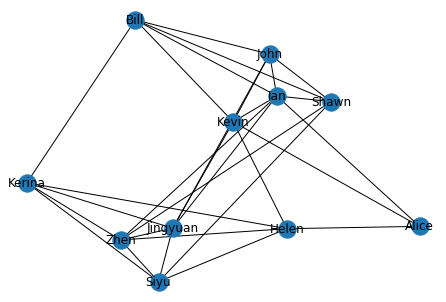

In [3]:
nx.draw(G, with_labels = True)

# Step 3: Describe the global network properties

In [4]:
density = nx.density(G)

print('The edge density is: %.3f' % (density))

The edge density is: 0.527


### The density measures how complete the graph is. This value of 0.527 indicates that this network is quite well-connected because we can see more than 52.7% links among all possible links.

# Step 4: Describe vertices

## Degree Centrality

In [5]:
degree = nx.degree(G)
degree

DegreeView({'Siyu': 5, 'Zhen': 6, 'Jingyuan': 6, 'Kerina': 5, 'Helen': 5, 'Alice': 3, 'Kevin': 6, 'Ian': 7, 'Shawn': 5, 'John': 5, 'Bill': 5})

In [6]:
pd.DataFrame(degree)

,0,1
0,Siyu,5
1,Zhen,6
2,Jingyuan,6
3,Kerina,5
4,Helen,5
5,Alice,3
6,Kevin,6
7,Ian,7
8,Shawn,5
9,John,5


### Ian has the most number of neighbors of the node, and Alice has the least number of neighbors of the node.

## Closeness centrality

In [7]:
close = nx.closeness_centrality(G)
pd.DataFrame.from_dict(close, orient = 'index')

,0
Siyu,0.666667
Zhen,0.714286
Jingyuan,0.714286
Kerina,0.666667
Helen,0.666667
Alice,0.588235
Kevin,0.714286
Ian,0.769231
Shawn,0.666667
John,0.666667


### Ian has the highest level of closeness to all the nodes.

## Betweenness centrality

In [8]:
between = nx.betweenness_centrality(G)
pd.DataFrame.from_dict(between, orient = 'index')

,0
Siyu,0.029630
Zhen,0.051852
Jingyuan,0.070370
Kerina,0.040741
Helen,0.081481
Alice,0.007407
Kevin,0.085185
Ian,0.107407
Shawn,0.044444
John,0.018519


### Ian serves as the bridge from one part of the graph to another.

# Step 5: Detect communities

## Community detection

In [9]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

c = list(greedy_modularity_communities(G))

print(len(c))

1


In [10]:
community_0 = sorted(c[0])
print(community_0)

['Alice', 'Bill', 'Helen', 'Ian', 'Jingyuan', 'John', 'Kerina', 'Kevin', 'Shawn', 'Siyu', 'Zhen']


### According to the result, there is only one community within the network. The possible explanation would be that these 11 students are all from a same department and taking similar classes, so they are within a same community.

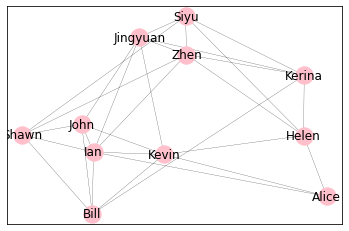

In [11]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos = pos, nodelist=community_0, node_color='pink', label = True)
nx.draw_networkx_edges(G, pos = pos, width = 0.2)
nx.draw_networkx_labels(G, pos=pos)
plt.show()

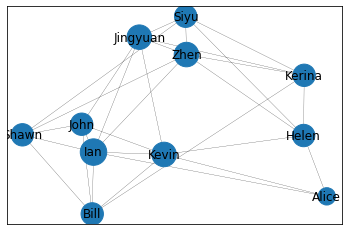

In [12]:
nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 100 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G, pos = pos, width = 0.2)
nx.draw_networkx_labels(G, pos=pos)
plt.show()
#adjust the node size by degree

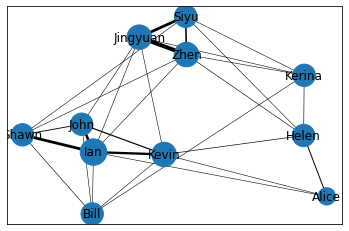

In [13]:
eWeight = nx.get_edge_attributes(G,'weight')

nx.draw_networkx_nodes(G, pos = pos, nodelist = dict(degree).keys(), node_size = [v * 100 for v in dict(degree).values()], label = True)
nx.draw_networkx_edges(G,pos, width = [1.1**e/2 for e in eWeight.values()])
nx.draw_networkx_labels(G, pos=pos)

plt.show()
#adjust the edge by weight; we are making the width of the edge as 1.1**e/2.

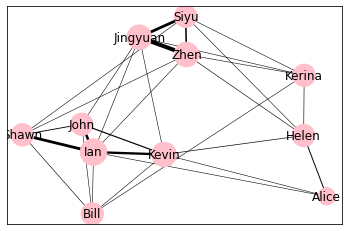

In [14]:
community_0_degree = {c: dict(degree)[c] for c in community_0}
nx.draw_networkx_nodes(G, pos = pos, 
                       nodelist=community_0,
                       node_color='pink',
                       node_size = [v * 100 for v in community_0_degree.values()],
                       label = True)
nx.draw_networkx_edges(G,pos, width = [1.1**e/2 for e in eWeight.values()])
nx.draw_networkx_labels(G, pos=pos)
plt.show()

# Step 6: The important case

### Based on the results and graphs, we can see that Ian has the most connections with other 10 students, because he has the greatest degree centrality, closeness centrality and betweeness centrality.

# Step 8: Conclusion

### In conclusion, this network of mutual friends of 11 students is well-connected and has 52.7% links. There is only one community detected due to the similar backgrounds the 11 students share. Based on the analysis of degree centrality, closeness centrality and betweeness centrality, we found that Ian is the importance case in the network who has the most connections and is able to connect others. We adjusted the node size by degree and edges by weight, and the graph shows that Ian has a stronger connection with Shawn, Kevin and John; Jingyuan, Siyu and Zhen have more mutual friends.